In [96]:
from matplotlib import pyplot as plt
import numpy as np
import cv2

import os
import json
import graphviz
os.environ["PATH"] += os.pathsep + 'C:/Program Files/Graphviz/bin/'

def edges_heap(arr):
    n = len(arr)
    k = int(n / 2)
    edges = [x for i in range(k) for x in ((i, 2 * i + 1), (i, 2 * i + 2)) if x[1] < n]
    return edges
    
def plot_heap(arr):
    f = graphviz.Digraph(filename = "heap.gv", format="png")
    names = list(map(str, range(len(arr))))
    positions = list(map(str, arr))
    for name, position in zip(names, positions):
         f.node(name, position)
            
    k = int(len(arr) / 2)
    #f.edges(((str(e[0]), str(e[1])) for e in edges_heap(arr)))
    edges = [f.edge(str(e[0]), str(e[1])) for e in edges_heap(arr)]
    return f

def remove_attribute(s, key):
    idx_start = s.find(key)
    idx_end = idx_start + len(key) + 1 # key=
    i = s.find(" ", idx_end)
    if i == -1:
        i = s.find("]", idx_end)
    idx_end = i
    s = s[:idx_start] + s[idx_end:]
    if " ]" in s:
        s = s.replace(" ]", "]")
    return s

def update_node(f, idx, key = "color", value = "red"):
    s = f.body[idx]
    if key in s:
        f.body[idx] = remove_attribute(s, key)
    if "[]" in f.body[idx]:
        f.body[idx] = f.body[idx][:-1] + "[{0}={1}]\n".format(key, value)
    else:
        f.body[idx] = f.body[idx][:-2] + " color=" + value + "]\n"
    return f

def update_edge(f, i, j, key = "color", value = "red", debug = False):
    idx = -1
    if debug:
        print(f.body)
    for num, el in enumerate(f.body):
        #s = "3 -> 8"
        s = str(i) + " -> " + str(j)
        if(s in el):
            idx = num
            break
        if debug:
            print(s)
    if(idx == -1):
        print("Not found")
        return f
    if(key in f.body[idx]):
        f.body[idx] = remove_attribute(f.body[idx], key)
    if not("[" in  f.body[idx]): # no attributes
        f.body[idx] = f.body[idx][:-1] + " [color=" + value + "]\n"
    elif "[]" in f.body[idx]:
        f.body[idx] = f.body[idx].replace("[]", "")
        f.body[idx] = f.body[idx][:-1] + " [{0}={1}]\n".format(key, value)
    else:
        pass # add more attributes
        
    return f

# Utilities
def plot_steps(imgs, names, cols = 3, size = (24, 3), path = ""):
    n = len(imgs)
    rows = int(np.ceil(n / cols))
    fig, axs = plt.subplots(rows, cols, figsize=(size[0], size[1] * rows))
    for ax in axs.ravel(): # remove axis from all canvas
        ax.axis("off")
    for i, img in enumerate(imgs):
        if rows == 1:
            ax = axs[i % cols]
        else:
            ax = axs[(i // cols), i % cols]
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        ax.imshow(img)
        ax.set_title(names[i])
    if path != "":
        fig.savefig(path)

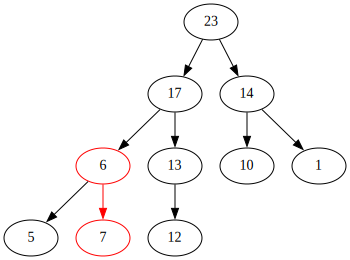

In [2]:
# Example: heap does not follow max-heap-property, respective nodes are highlighted
arr = [23, 17, 14, 6, 13, 10, 1, 5, 7, 12]
f = plot_heap(arr)
f = update_node(f, 3)
f = update_node(f, 8)
f = update_edge(f, 3, 8)
f.render(filename="output/example2")
f
#print(json.dumps(f.__dict__, indent=2)) # for debug

In [117]:
import numpy as np

class Heap:
    def __init__(self, arr):
        self.arr = np.array(arr)
        self.heap_size = len(arr)
        
    def get_value(self, i):
        return self.arr[i]
    
    def get_children_idx(self, i):
        return 2 * i + 1,  2 * i + 2
    
    def max_heapify_recursive(self, idx):
        '''
        It is supposed that both subtrees of the parent node follow max-heap property except mayby node with index=idx,
        so we fix the node
        Result: the whole subtree with node with index=idx as a root follows max-heap property
        '''
        l, r = self.get_children_idx(idx)
        largest = idx
        if(l < self.heap_size and self.arr[largest] < arr[l]):
            largest = l
        if(r < self.heap_size and self.arr[largest] < arr[r]):
            largest = r
        if(largest != idx):
            self.arr[idx], self.arr[largest] = self.arr[largest], self.arr[idx]
            self.max_heapify_recursive(largest)
            
    def max_heapify_recursive_vis(self, idx, res, path):
        path.append(idx)
        f = plot_heap(self.arr)
        [update_node(f, i) for i in path]
        [update_edge(f, path[i], path[i + 1]) for i in range(len(path) - 1)]
        res.append(f)
        
        l, r = self.get_children_idx(idx)
        largest = idx
        if(l < self.heap_size and self.arr[largest] < arr[l]):
            largest = l
        if(r < self.heap_size and self.arr[largest] < arr[r]):
            largest = r
        if(largest != idx):
            self.arr[idx], self.arr[largest] = self.arr[largest], self.arr[idx]
            self.max_heapify_recursive_vis(largest, res, path)
            
    def max_heapify(self, idx):
        l, r = self.get_children_idx(idx)
        largest = idx
        while l < self.heap_size or r < self.heap_size:
            if(l < self.heap_size and self.arr[largest] < self.arr[l]):
                largest = l
            if(r < self.heap_size and self.arr[largest] < self.arr[r]):
                largest = r
            if(largest != idx):
                self.arr[idx], self.arr[largest] = self.arr[largest], self.arr[idx]
                idx = largest
                l, r = self.get_children_idx(idx)
            else:
                break
            
    def plot_steps_graph(self, res, cols = 3, path = ""):
        pathes = [f.render(filename="output/step_" + str(i)) for i, f in enumerate(res)]
        imgs = [cv2.imread(path) for path in pathes]
        names = ['Step ' + str(i) for i in range(len(pathes))]
        plot_steps(imgs, names, cols = cols, size=(20, 10), path = path) 
        
    def max_heapify_vis(self, idx, res, path, show = True):
        path.append(idx)
        f = plot_heap(self.arr)
        [update_node(f, i) for i in path]
        [update_edge(f, path[i], path[i + 1]) for i in range(len(path) - 1)]
        res.append(f)
        
        l, r = self.get_children_idx(idx)
        largest = idx
        while l < self.heap_size or r < self.heap_size:
            if(l < self.heap_size and self.arr[largest] < self.arr[l]):
                largest = l
            if(r < self.heap_size and self.arr[largest] < self.arr[r]):
                largest = r
            if(largest != idx):
                self.arr[idx], self.arr[largest] = self.arr[largest], self.arr[idx]
                idx = largest
                
                path.append(idx)
                f = plot_heap(self.arr)
                [update_node(f, i) for i in path]
                [update_edge(f, path[i], path[i + 1]) for i in range(len(path) - 1)]
                res.append(f)
                
                l, r = self.get_children_idx(idx)
            else:
                break
                
        if show:
            self.plot_steps_graph(res)
                
    def min_heapify(self, idx):
        l, r = self.get_children_idx(idx)
        smallest = idx
        while l < self.heap_size or r < self.heap_size:
            if(l < self.heap_size and self.arr[smallest] > arr[l]):
                smallest = l
            if(r < self.heap_size and self.arr[smallest] > arr[r]):
                smallest = r
            if(smallest != idx):
                self.arr[idx], self.arr[smallest] = self.arr[smallest], self.arr[idx]
                idx = smallest
                l, r = self.get_children_idx(idx)
            else:
                break
            
            
    def min_heapify_vis(self, idx, res, path, show = True):
        path.append(idx)
        f = plot_heap(self.arr)
        [update_node(f, i) for i in path]
        [update_edge(f, path[i], path[i + 1]) for i in range(len(path) - 1)]
        res.append(f)
        
        l, r = self.get_children_idx(idx)
        smallest = idx
        while l < self.heap_size or r < self.heap_size:
            if(l < self.heap_size and self.arr[smallest] > arr[l]):
                smallest = l
            if(r < self.heap_size and self.arr[smallest] > arr[r]):
                smallest = r
            if(smallest != idx):
                self.arr[idx], self.arr[smallest] = self.arr[smallest], self.arr[idx]
                idx = smallest
                
                path.append(idx)
                f = plot_heap(self.arr)
                [update_node(f, i) for i in path]
                [update_edge(f, path[i], path[i + 1]) for i in range(len(path) - 1)]
                res.append(f)
                
                l, r = self.get_children_idx(idx)
            else:
                break
        if show:       
            self.plot_steps_graph(res)
                
    def build_max_heap(self):
        self.heap_size = len(self.arr)
        for i in range(int(len(self.arr) / 2), -1, -1):
            self.max_heapify(i)
            
    def build_max_heap_vis(self):
        res = []
        self.heap_size = len(self.arr)
        for i in range(int(len(self.arr) / 2), -1, -1):
            path = []
            self.max_heapify_vis(i, res, path, False)
            
        self.plot_steps_graph(res, path = "output/build_max_heap.png")
        
    def heap_sort(self):
        self.build_max_heap()
        for i in range(self.heap_size - 1, 0, -1):
            self.arr[i], self.arr[0] = self.arr[0], self.arr[i]
            self.heap_size = self.heap_size - 1
            self.max_heapify(0)
            
    def heap_sort_vis(self):
        def update_plot(f):
            #f = res[0]
            [update_node(f, j, value = "green") for j in range(i, len(self.arr))]
            [update_edge(f, int((j - 1) / 2), j, value = "white", debug = False) for j in range(i, len(self.arr))]
            steps.append(f)
            
        self.build_max_heap()
        steps = [plot_heap(self.arr)]
        for i in range(self.heap_size - 1, 0, -1):
            self.arr[i], self.arr[0] = self.arr[0], self.arr[i]
            self.heap_size = self.heap_size - 1
            res, path = [], []
            self.max_heapify_vis(0, res, path, False)
            update_plot(res[0])
            update_plot(res[-1])
            
        self.plot_steps_graph(steps, path = "output/heap_sort.png")
        
    
        

In [ ]:
# Check max-heapify
arr = [27, 17, 3, 16, 13, 10, 1, 5, 7, 12, 4, 8, 9, 0]
heap = Heap(arr)
res, path = [], []
heap.max_heapify_vis(2, res, path)

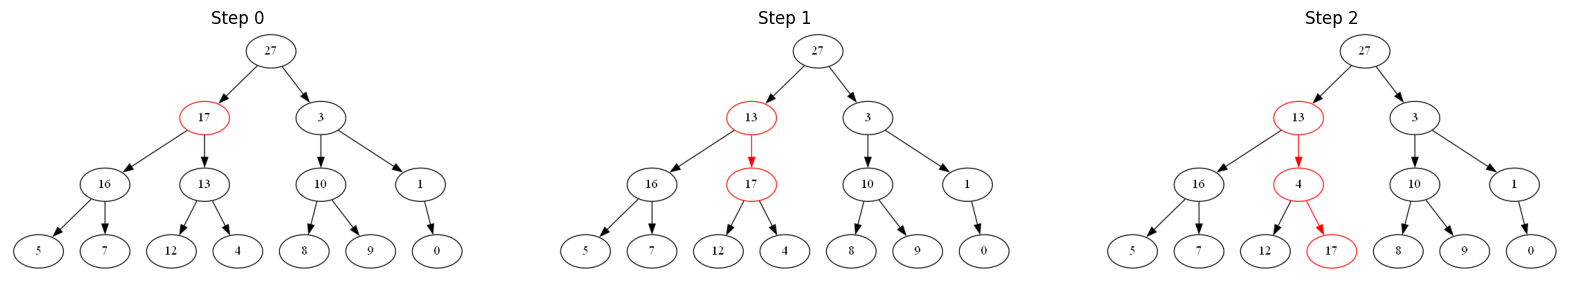

In [28]:
# Check min-heapify
arr = [27, 17, 3, 16, 13, 10, 1, 5, 7, 12, 4, 8, 9, 0]
heap = Heap(arr)
res, path = [], []
heap.min_heapify_vis(1, res, path)

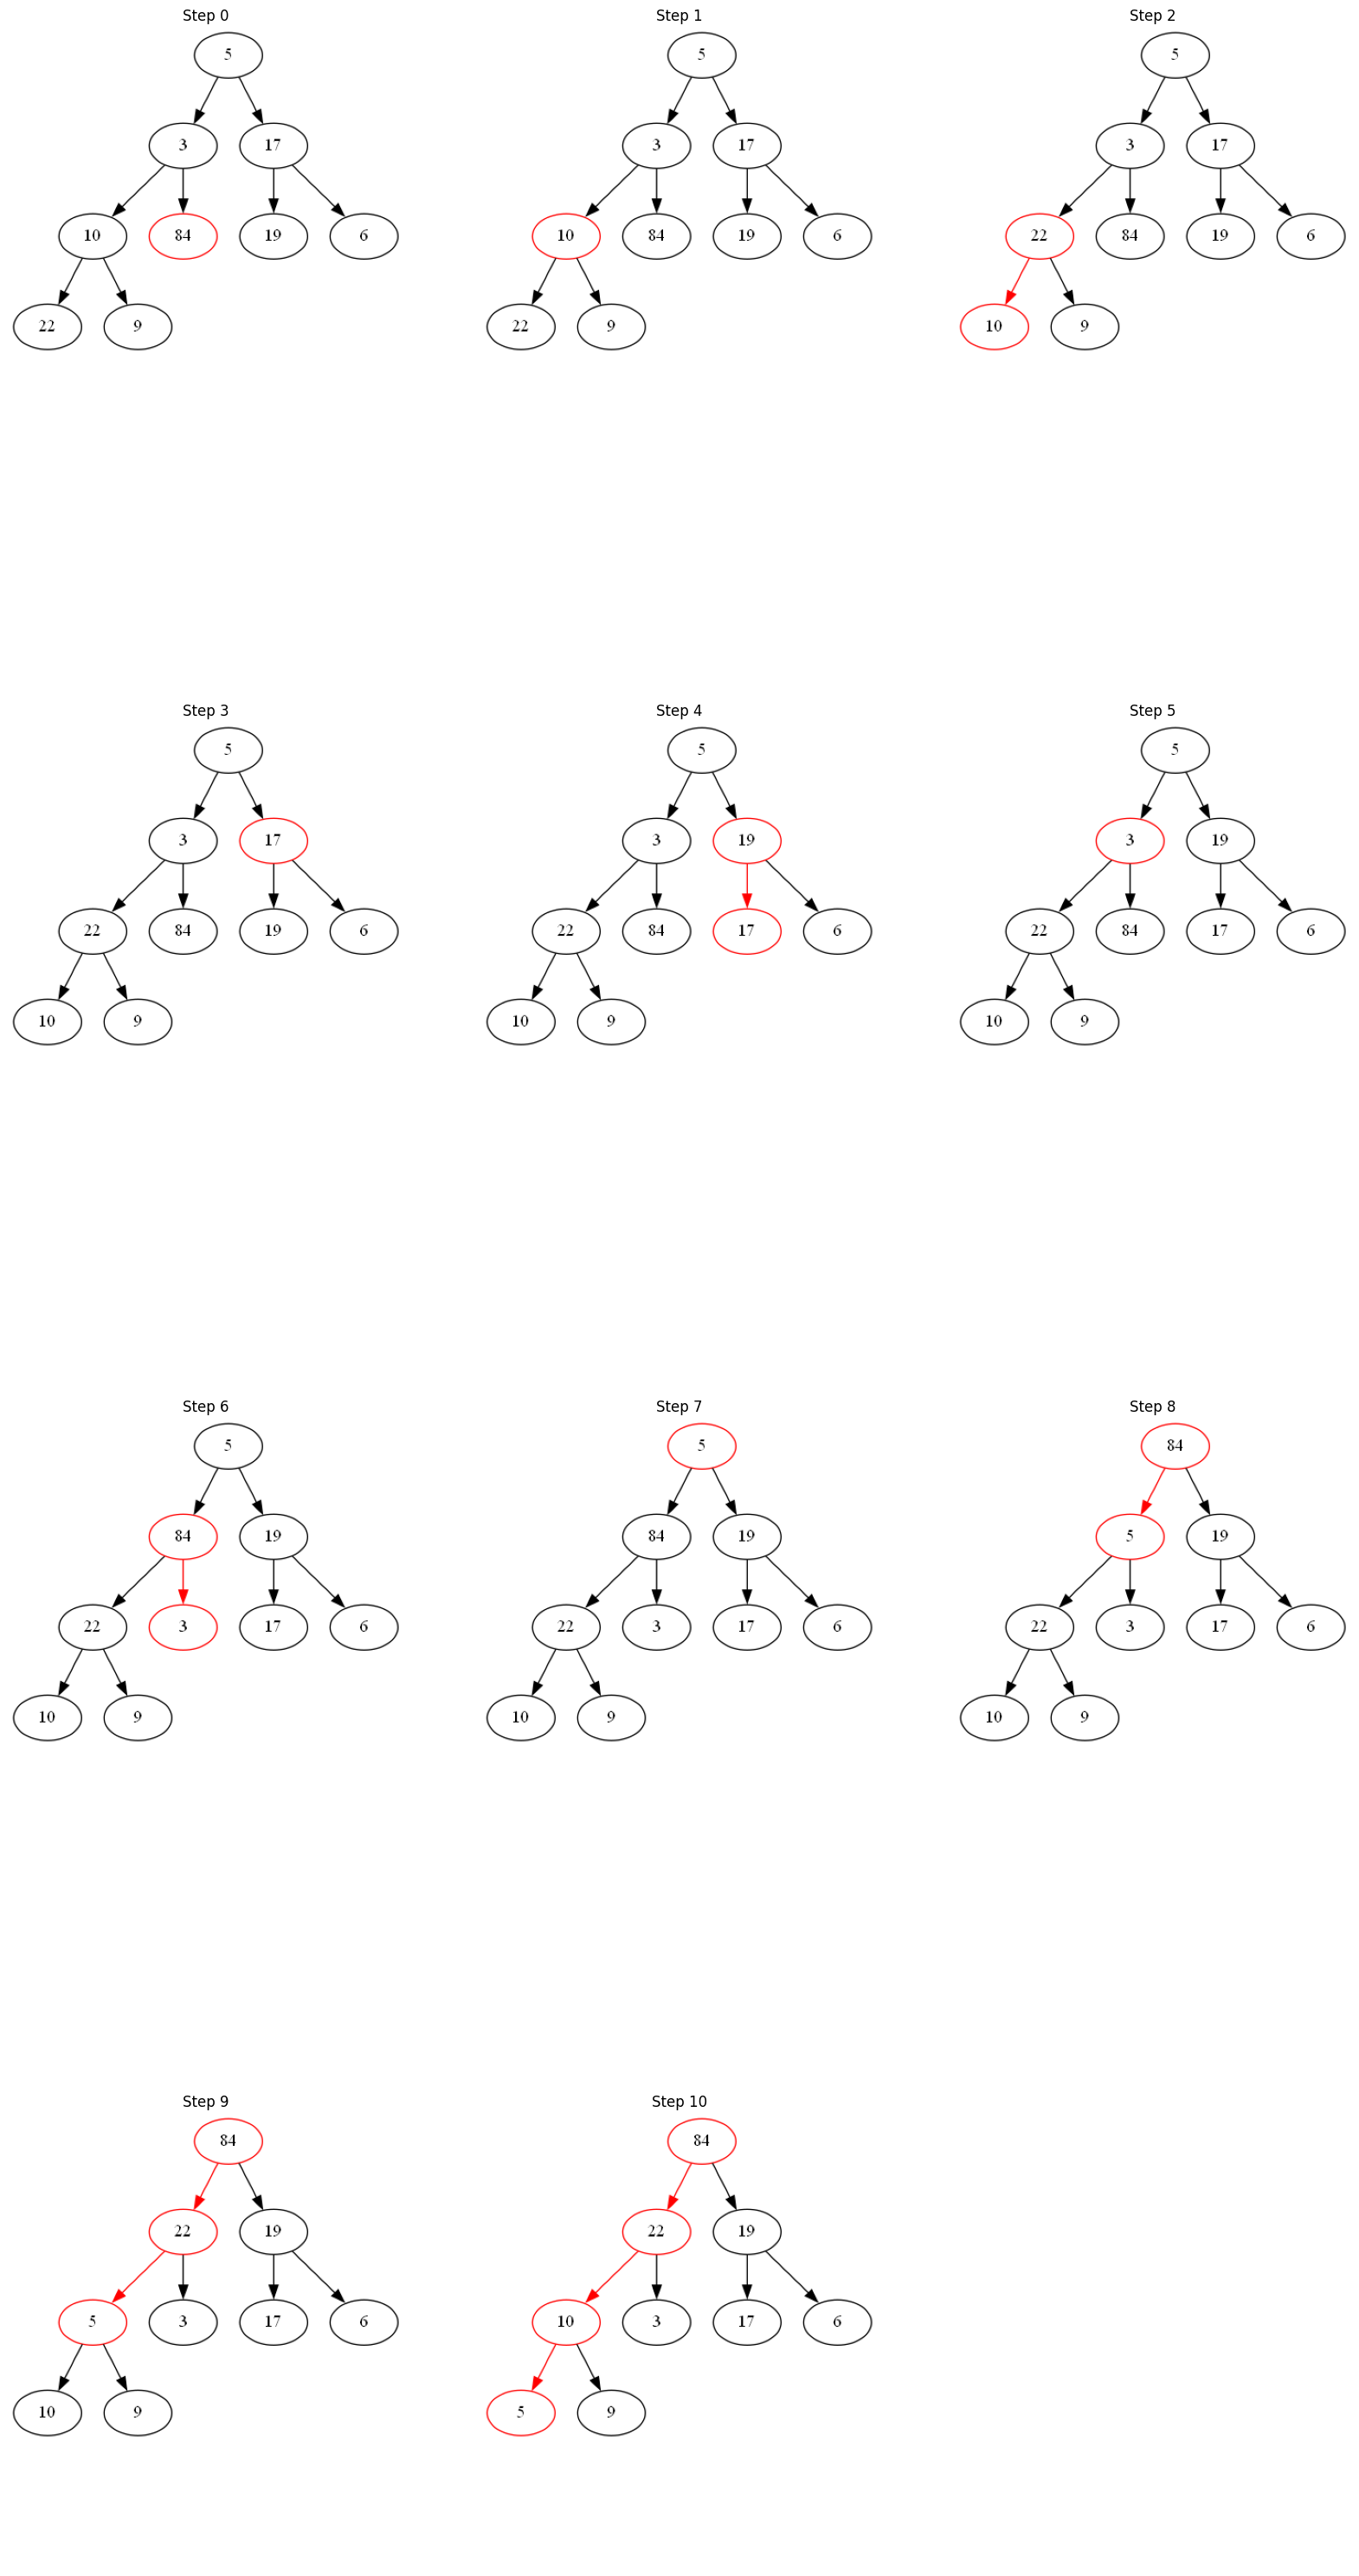

In [71]:
# Check build_max_heap
arr = [5, 3, 17, 10, 84, 19, 6, 22, 9]
heap = Heap(arr)
heap.build_max_heap_vis()

In [118]:
# Check heap_sort
arr = [5, 3, 17, 10, 84, 19, 6, 22, 9]
heap = Heap(arr)
heap.heap_sort()
print(heap.arr)

[ 3  5  6  9 10 17 19 22 84]


[ 2  4  5  7  8 13 17 20 25]


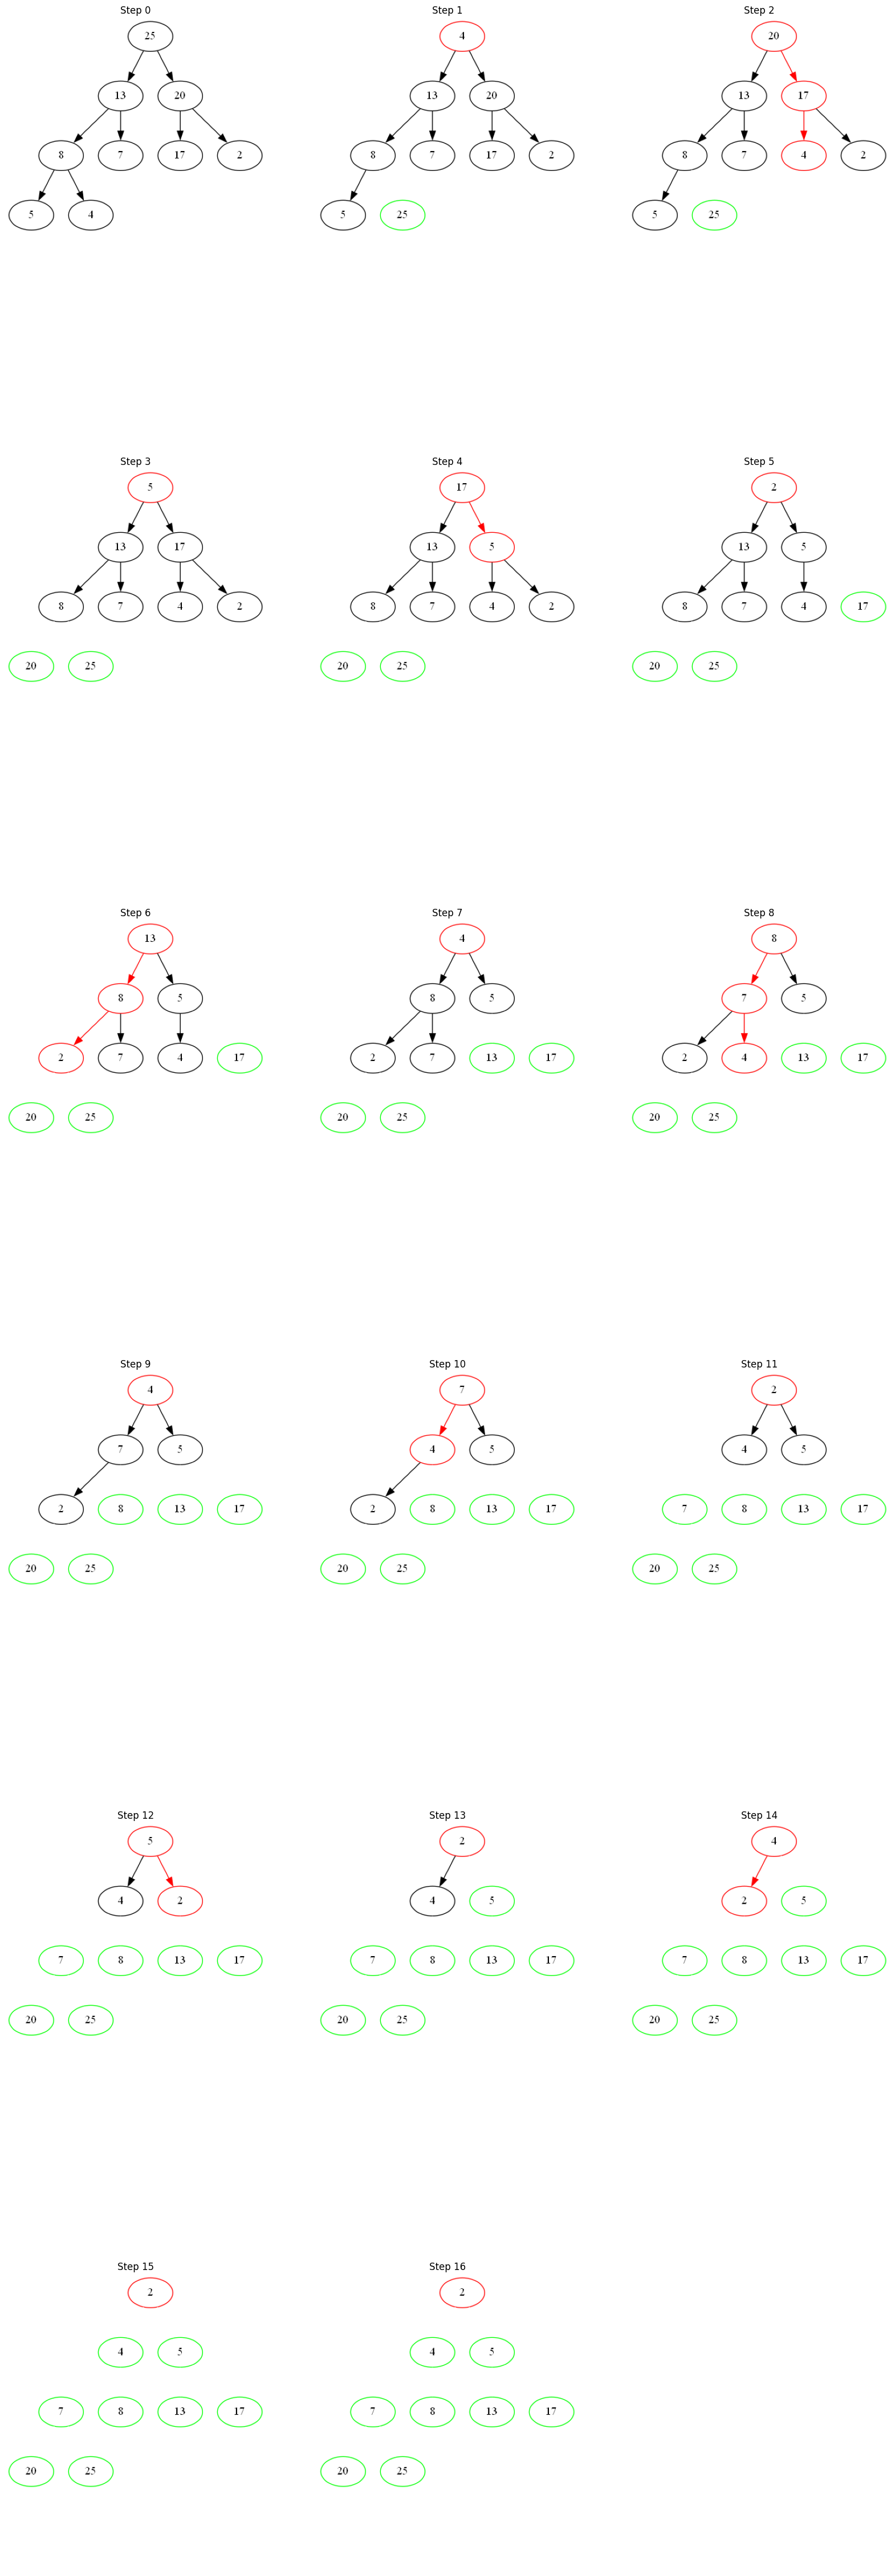

In [119]:
# Check heap_sort
arr = [5, 13, 2, 25, 7, 17, 20, 8, 4]
heap = Heap(arr)
heap.heap_sort_vis()
print(heap.arr)

[ 5  7 10 12 15 17 22]


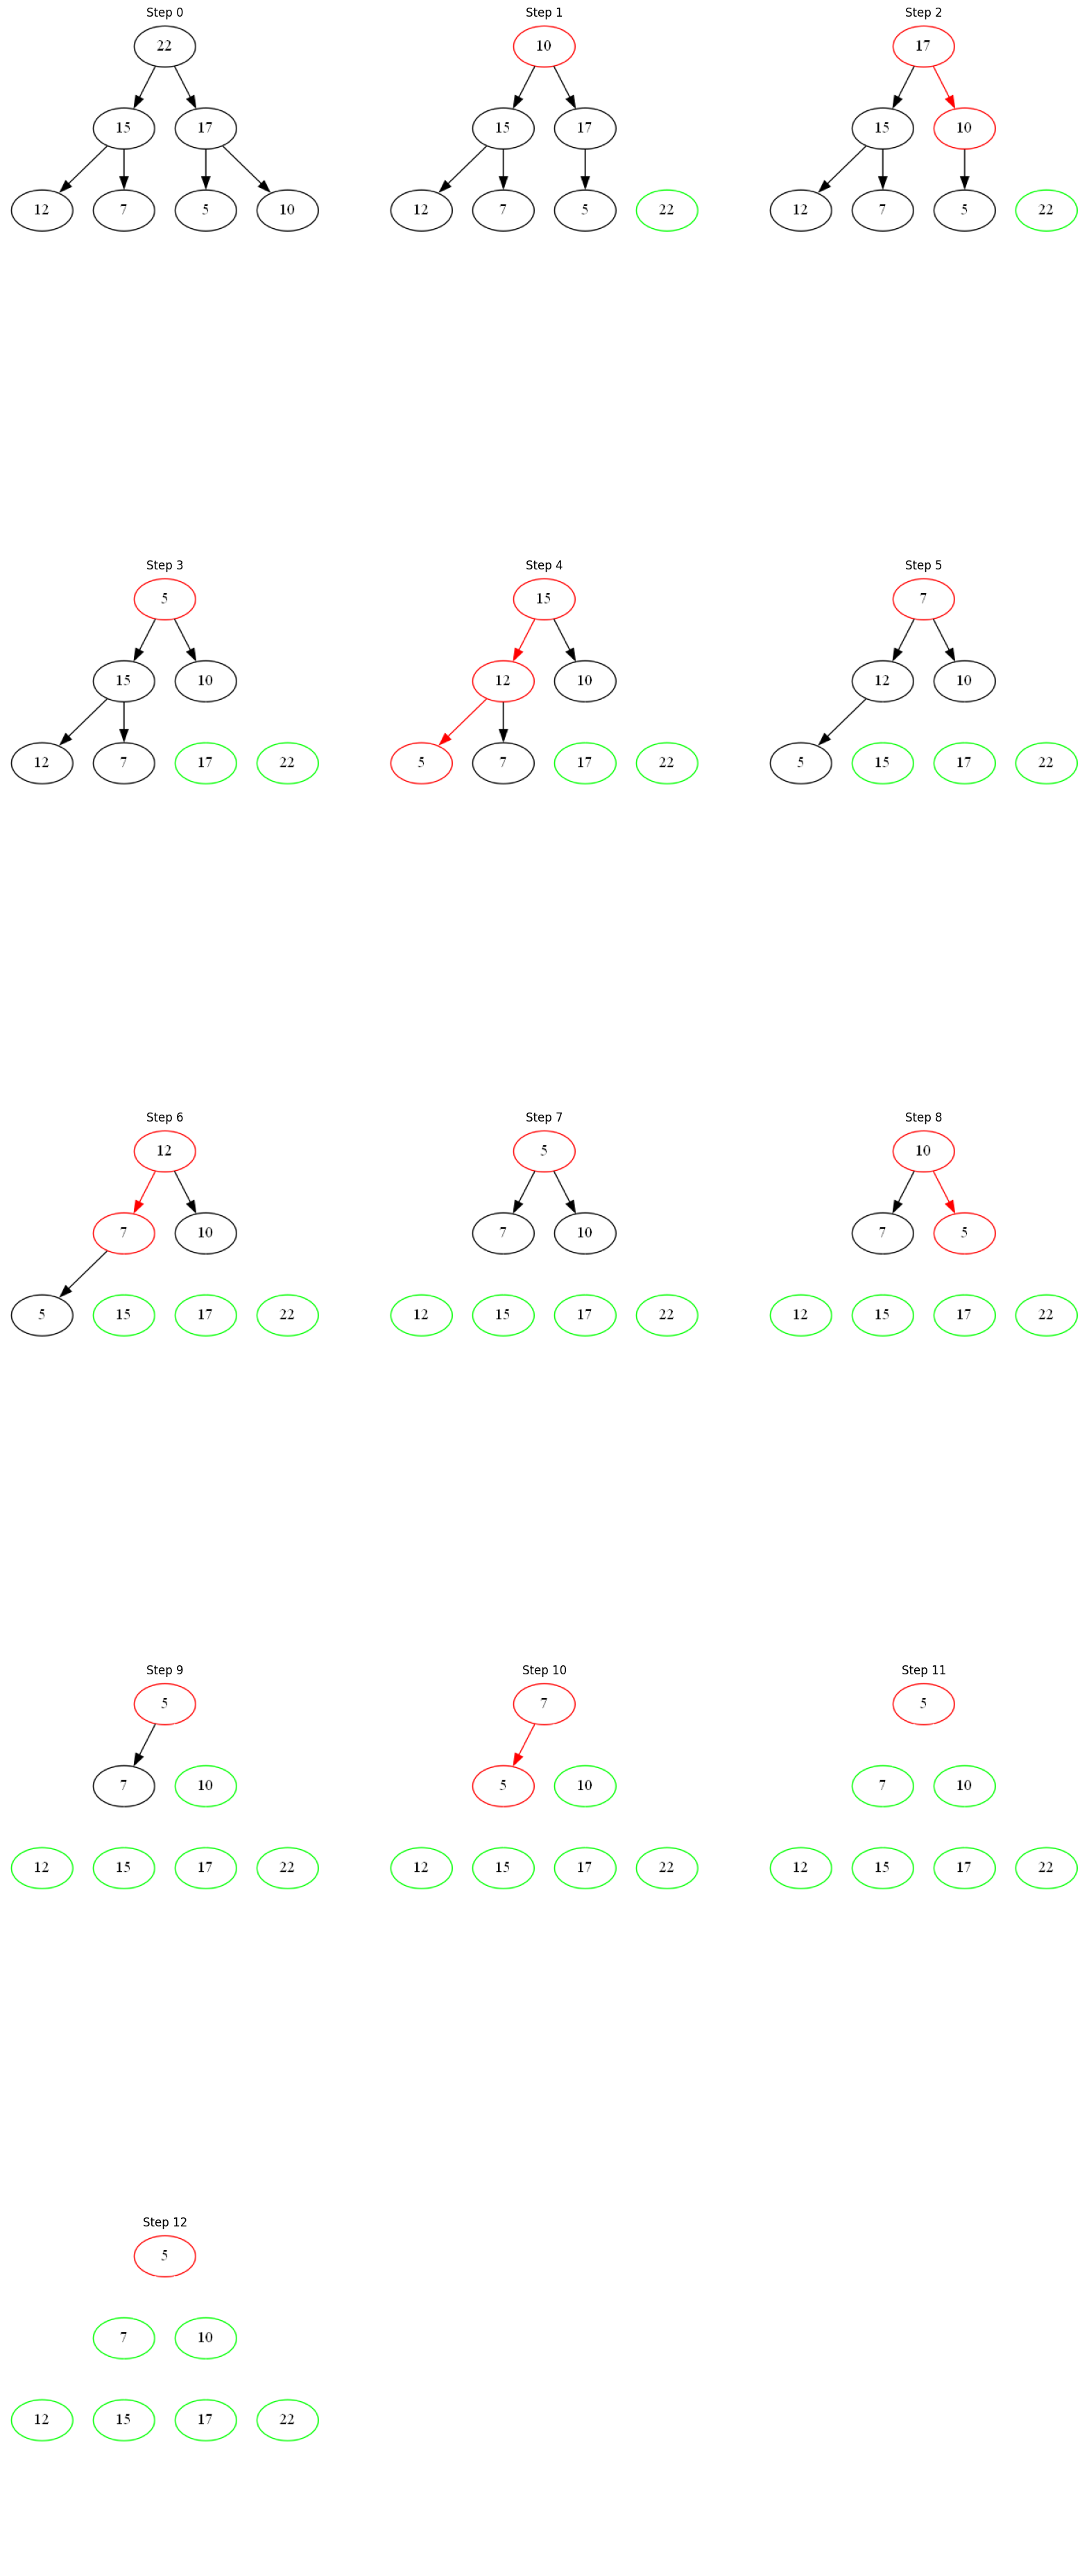

In [122]:
# Check heap_sort
arr = [5, 7, 10, 12, 15, 17, 22]
heap = Heap(arr)
heap.heap_sort_vis()
print(heap.arr)

[ 5  7 10 12 15 17 22]


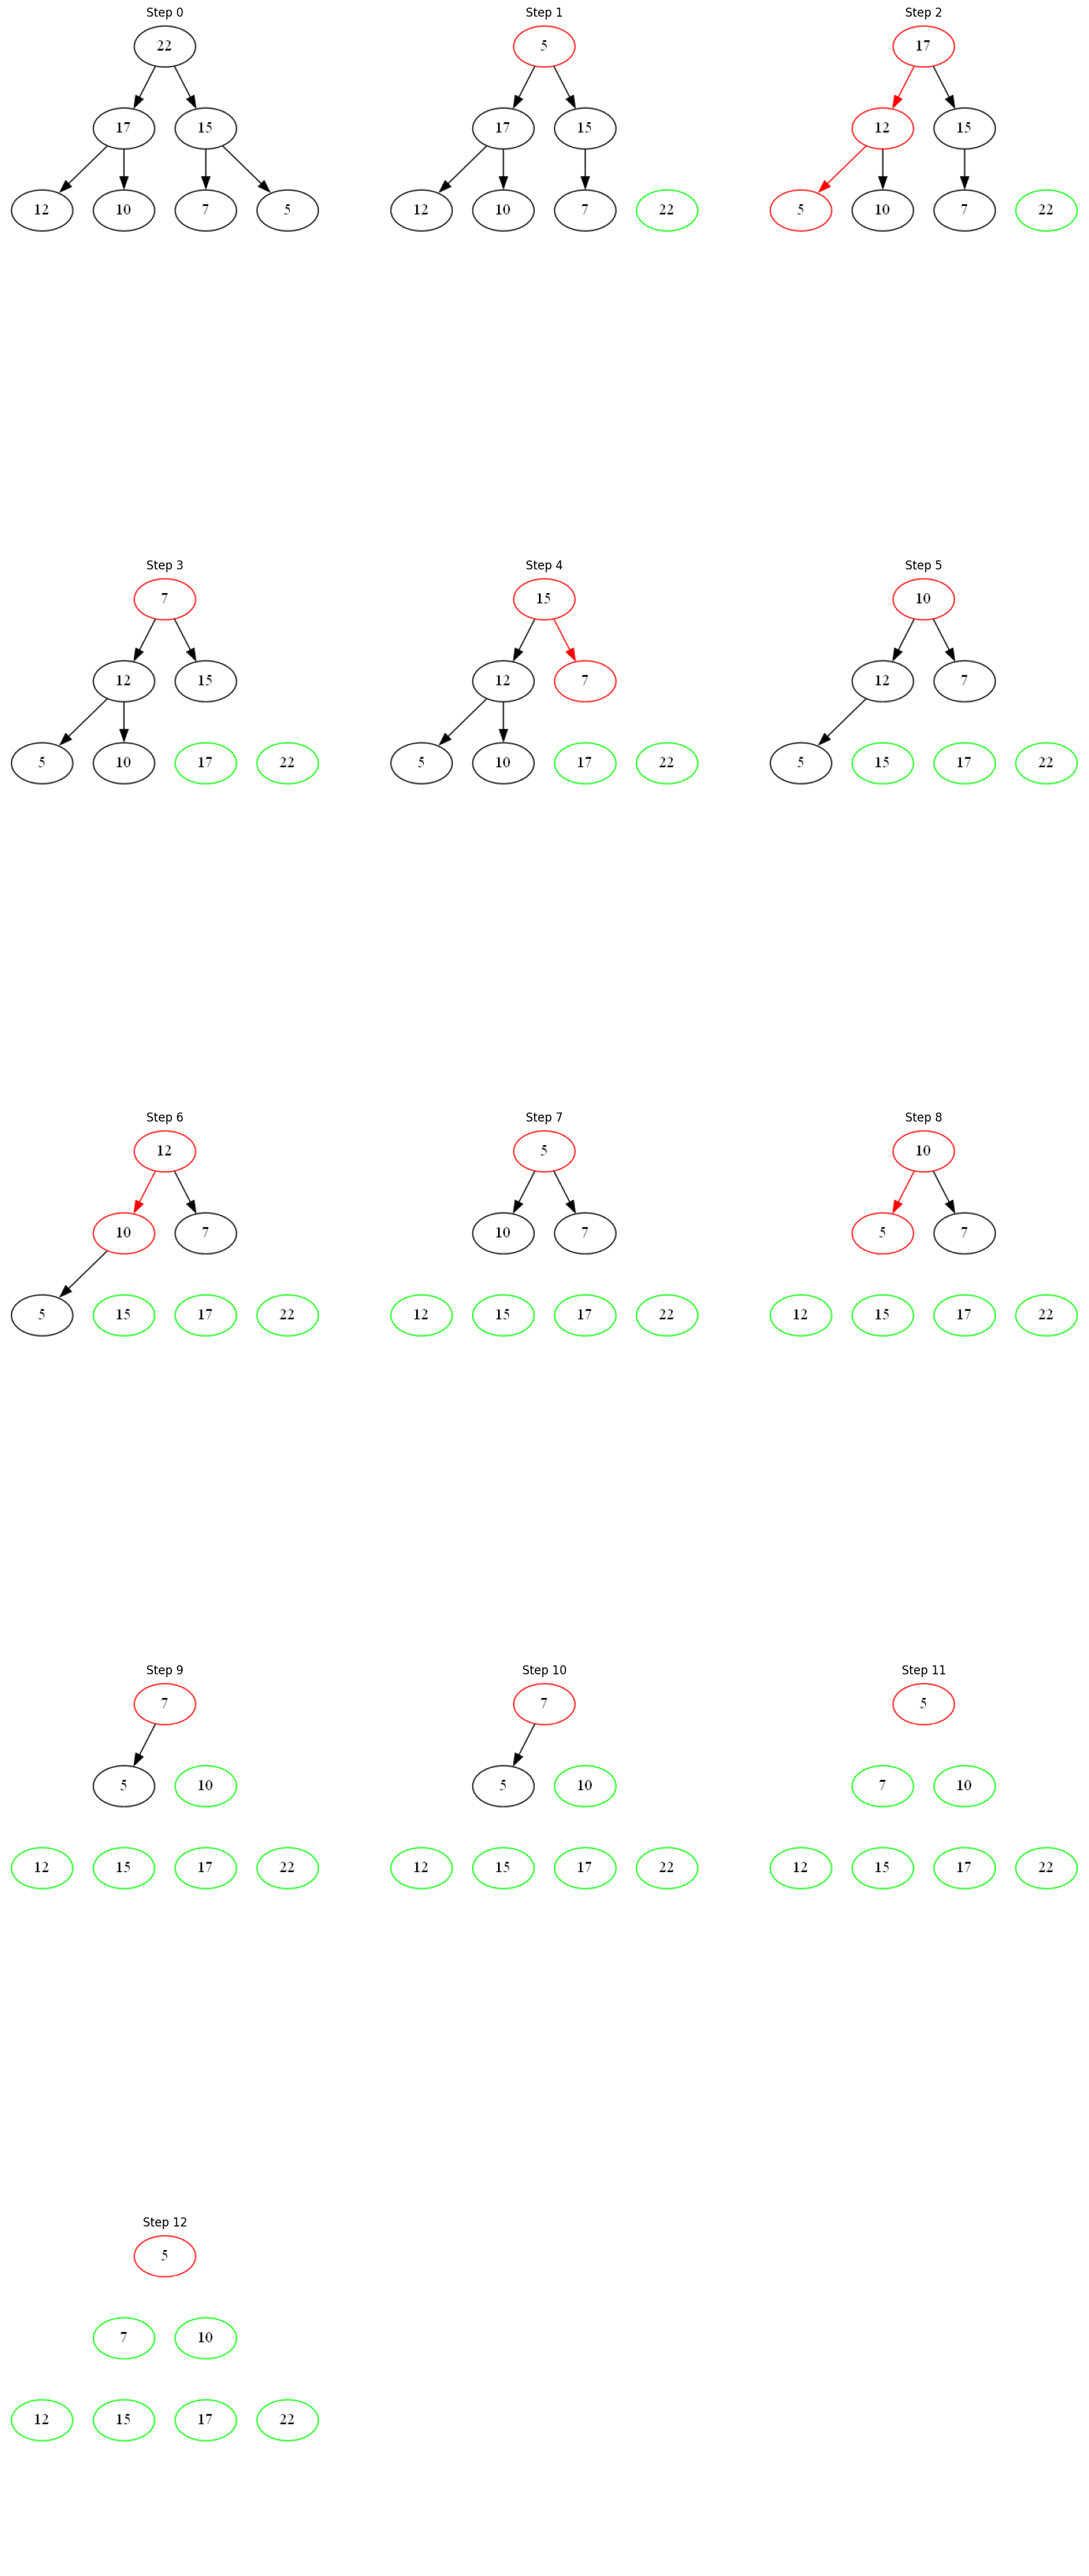

In [123]:
# Check heap_sort
arr = [22, 17, 15, 12, 10, 7, 5]
heap = Heap(arr)
heap.heap_sort_vis()
print(heap.arr)

[0 0 0 0 1 1 1 1 1 1 1 1 1 1 1]


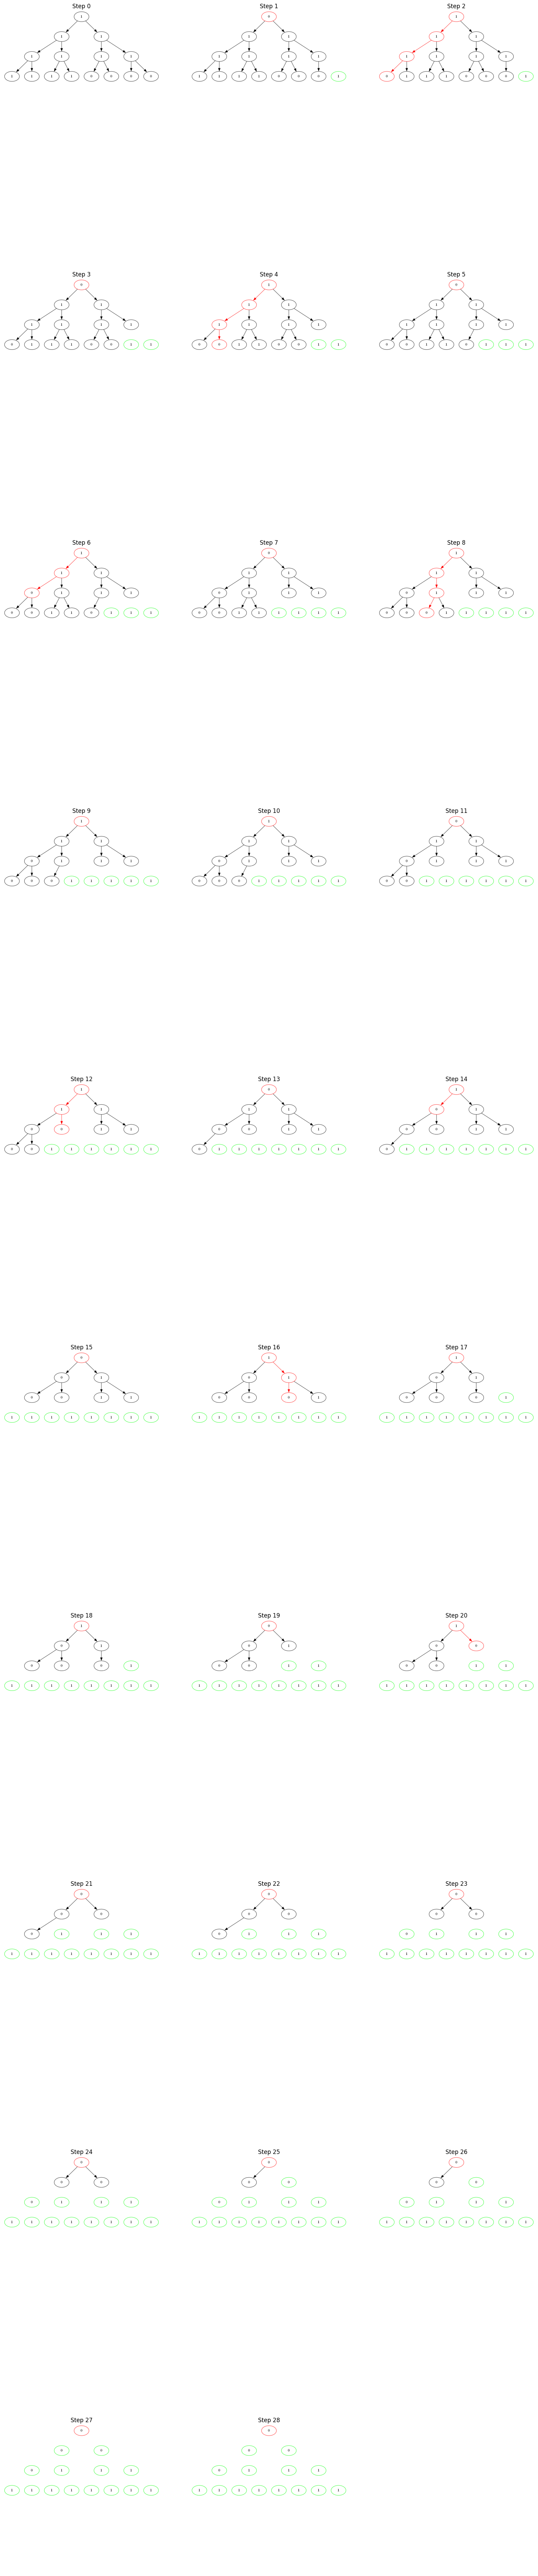

In [127]:
# Check heap_sort
arr = [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0]
heap = Heap(arr)
heap.heap_sort_vis()
print(heap.arr)

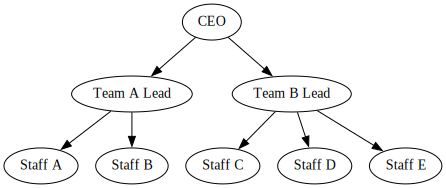

In [37]:
# Snippets
import graphviz
f = graphviz.Digraph(filename = "output/plain organogram 1.gv")
names = ["A","B","C","D","E","F","G","H"]
positions = ["CEO","Team A Lead","Team B Lead", "Staff A","Staff B", "Staff C", "Staff D", "Staff E"]
for name, position in zip(names, positions):
     f.node(name, position)
f.edge("A","B"); f.edge("A","C") #CEO to Team Leads
f.edge("B","D"); f.edge("B","E") #Team A relationship
f.edge("C","F"); f.edge("C","G"); f.edge("C","H") #Team B relationship
 
f
# https://towardsdatascience.com/graph-visualisation-basics-with-python-part-iii-directed-graphs-with-graphviz-50116fb0d670
# Good examples: https://graphviz.readthedocs.io/en/stable/examples.html